# Importing libraries

In [1]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import segmentation_models as sm

Segmentation Models: using `keras` framework.


# Getting training images and their masks

In [2]:
train_images = []
directory_path = glob.glob(r'C:\Users\user\Desktop\intern\train\dataset\imgs')[0]
for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (256,256))
    train_images.append(img) 
train_images = np.array(train_images)
train_masks = []
directory_path = glob.glob(r'C:\Users\user\Desktop\intern\train\dataset\masks')[0]
for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256,256))
    train_masks.append(img) 
train_masks = np.array(train_masks)

# Plotting an example

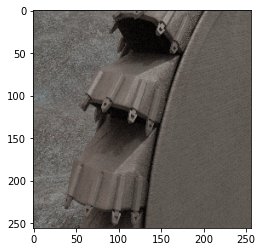

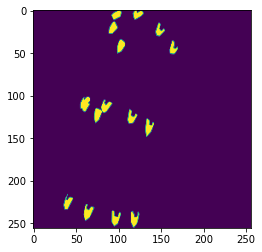

In [4]:
plt.imshow(train_images[140])
plt.show()
plt.imshow(train_masks[140])
plt.show()

# Dividing model to train and validation set

In [5]:
X = train_images/255
y = train_masks/255
y = np.expand_dims(y, axis=3)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting the model

In [6]:
sm.set_framework('tf.keras')
model = sm.Unet('resnet34',  encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

# Training the model

In [7]:
model.fit(X_train, 
          y_train,
          batch_size=8, 
          epochs=10,
          verbose=1, validation_data=(X_val, y_val))
model.save('final_one')

Epoch 1/10
24/24 [==============================] - 274s 11s/step - loss: 0.3843 - binary_accuracy: 0.9102 - val_loss: 0.3463 - val_binary_accuracy: 0.9759
Epoch 2/10
24/24 [==============================] - 273s 11s/step - loss: 0.1361 - binary_accuracy: 0.9830 - val_loss: 0.1769 - val_binary_accuracy: 0.9759
Epoch 3/10
24/24 [==============================] - 282s 12s/step - loss: 0.0673 - binary_accuracy: 0.9880 - val_loss: 0.2987 - val_binary_accuracy: 0.9759
Epoch 4/10
24/24 [==============================] - 255s 11s/step - loss: 0.0390 - binary_accuracy: 0.9900 - val_loss: 0.4096 - val_binary_accuracy: 0.9759
Epoch 5/10
24/24 [==============================] - 235s 10s/step - loss: 0.0266 - binary_accuracy: 0.9908 - val_loss: 0.0989 - val_binary_accuracy: 0.9759
Epoch 6/10
24/24 [==============================] - 248s 10s/step - loss: 0.0198 - binary_accuracy: 0.9912 - val_loss: 0.0985 - val_binary_accuracy: 0.9759
Epoch 7/10
24/24 [==============================] - 239s 10s/ste

C:\Users\user\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\user\anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


# Testing the model on test images

In [5]:
from tensorflow import keras
test_images = []
model = keras.models.load_model('final_one', compile=False)
directory_path = glob.glob(r'C:\Users\user\Desktop\intern\train\dataset\imgs')[0]
for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (256,256))
    test_images.append(img) 
test_images = np.array(test_images)

# Saving the model result on new masks

In [11]:
for x in range(len(test_images)):     
    test_img = cv2.resize(test_images[x], (256,256),cv2.IMREAD_COLOR)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
    test_img = np.expand_dims(test_img, axis=0)
    prediction = model.predict(test_img)
    prediction_image = prediction.reshape((256,256))
    image_name = 'Image0' + str(int(161) + x)+'.png'
    print(image_name)
    plt.imsave(image_name, prediction_image, cmap='gray')

Image0161.png
Image0162.png
Image0163.png
Image0164.png
Image0165.png
Image0166.png
Image0167.png
Image0168.png
Image0169.png
Image0170.png
Image0171.png
Image0172.png
Image0173.png
Image0174.png
Image0175.png
Image0176.png
Image0177.png
Image0178.png
Image0179.png
Image0180.png
Image0181.png
Image0182.png
Image0183.png
Image0184.png
Image0185.png
Image0186.png
Image0187.png
Image0188.png
Image0189.png
Image0190.png
Image0191.png
Image0192.png
Image0193.png
Image0194.png
Image0195.png
Image0196.png
Image0197.png
Image0198.png
Image0199.png
Image0200.png
Image0201.png
Image0202.png
Image0203.png
Image0204.png
Image0205.png
Image0206.png
Image0207.png
Image0208.png
Image0209.png
Image0210.png
Image0211.png
Image0212.png
Image0213.png
Image0214.png
Image0215.png
Image0216.png
Image0217.png
Image0218.png
Image0219.png
Image0220.png
Image0221.png
Image0222.png
Image0223.png
Image0224.png
Image0225.png
Image0226.png
Image0227.png
Image0228.png
Image0229.png
Image0230.png
Image0231.png
Image0